# 1) k-Means clustering algorithm

>Today's problem set will be straightforward and open-ended. I encourage you to do the first problem, while the second problem is more exploratory and you can do as much or as little as you like (it's cool though!).

**First, recreate the results from lecture using the scikit-learn model. Then, try to implement k-means clustering yourselves without using the scikit-learn model.** You should think about what kinds of data structures (lists, arrays, tuples, etc.) that you might want to use to store your cluster centers and your labels. Refer to the in-class notebook if you need some ideas.

The k-means clustering pseudocode is reproduced below:
1. Randomly initialize the cluster centers 
2. Repeat for `max_iter` iterations:
    3. Assign training examples to the nearest cluster center
    4. Update the cluster centers by computing the mean of the cluster's assigned training examples

Some things to think about:
* Start by initializing static cluster centers (i.e. put the clusters somewhere specific and constant at the start rather than working on the random initialization). After your k-means clustering algorithm works, then rewrite the initialization to be random using `np.random.random`.
* It might be easier to think about one example at a time inside the loop. Maybe consider computing the distance from a single example to each cluster center and then assigning the single example to the closest cluster (as an example, the distance between `a` and `b` can be calculated using the L2-norm `np.linalg.norm(a-b)`). After you assign the first example to a cluster, move to the next one, and repeat.
* In lecture, we used a trick to plot training examples by their cluster by selecting only the examples belonging to that specific cluster. You might consider using this trick when you want to update the cluster center.
* **You should check your implementation using the k-means clustering algorithm from scikit-learn.** Please import the k-means clustering algorithm using `from sklearn.cluster import KMeans` and see if your model's behavior is similar. 

Extra topic (not required): try running your implementation of k-means clustering and running the scikit-learn implementation of k-means clustering and plot the results of both methods on a single plot with a separate subplot for each (search subplot matplotlib for ideas/examples/documentation).



---


**Here's the dataset for problem 1. Run, but do not edit the following cell.**

If you want to try different datasets later in the problem set, copy the cell below and update the number in the `numpy.random.seed(1)` function to a different positive integer -- this will randomize the dataset. When you copy the code, you can also edit the centers if you like.

In [ ]:
import numpy as np

# set the random seed for repeatability
np.random.seed(2) 

# set our constants for the dataset
d = 2    # dimensions
m = 100  # samples

# generate m randomly-distributed d-dimensional samples
X = np.random.random((m, d))

# set the centers
center_1 = [ 0,4]
center_2 = [-1,2]
center_3 = [ 3,0]

# generate 3 clusters each with m normally-distributed, 2-dimensional samples
X1 = np.random.multivariate_normal(center_1, [[1,  0.8], [0.8,  1]],   size=m)
X2 = np.random.multivariate_normal(center_2, [[0.3,0.2], [0.2,0.3]], size=m)
X3 = np.random.multivariate_normal(center_3, [[1,  0],   [0,  0.5]], size=m)

# generate the dataset matrix (3*m rows, d columns)
X = np.append(X1, X2, axis=0)
X = np.append(X,  X3, axis=0)

## Scikit-learn implementation

Follow the comments below and implement the scikit-learn k-means clustering algorithm.

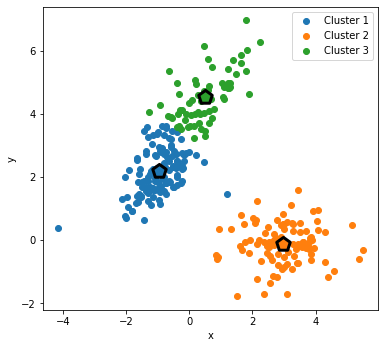

In [ ]:
# import the scikit-learn model and pyplot

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# generate and fit the model to the dataset using k clusters (your choice on how many -- I encourage you to do several and explore the performance)

model = KMeans(n_clusters=3)
model.fit(X)

# plot the cluster centers and training examples using different colors for each cluster

fig = plt.figure(figsize=(6,6))
ax = fig.gca()
ax.set_aspect('equal')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

for i in range(3):
    plt.scatter(X[model.labels_==i,0],X[model.labels_==i,1],marker='o',color=colors[i],label=("Cluster %d" %(i+1)))
    plt.scatter(model.cluster_centers_[i,0],model.cluster_centers_[i,1], marker='p', edgecolors='black', linewidths=3, s=200, color=colors[i])

                
plt.xlabel('x')           
plt.ylabel('y')
plt.legend()


## Your implementation

Follow the comments below and implement your own k-means clustering algorithm.

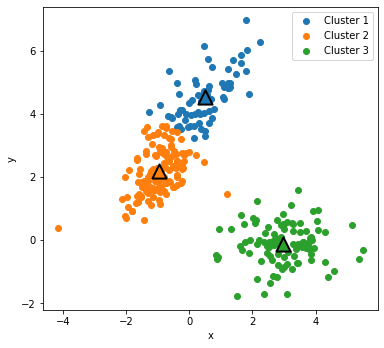

In [ ]:
# write your implementation of k-means clustering

# 1. Randomly initialize the cluster centers 

# 2. Repeat for `max_iter` iterations:

#    3. Assign training examples to the nearest cluster center

#    4. Update the cluster centers by computing the mean of the cluster's assigned training examples

# generate and fit the model to the dataset using k clusters (your choice on how many -- I encourage you to do several and explore the performance)
from math import sqrt
while True:
    cluster_num_list = []
    for i in range(len(X)):
        dist = [sqrt(((center_1[0]-X[i, 0])**2)+((center_1[1]-X[i, 1])**2)), sqrt(((center_2[0]-X[i, 0])**2)+((center_2[1]-X[i, 1])**2)), sqrt(((center_3[0]-X[i, 0])**2)+((center_3[1]-X[i, 1])**2))]
        a = 999999999
        main = 0
        main_index = 0
        for j in range(len(dist)):
            if dist[j] < a:
                main = dist[j]
                a = dist[j]
                main_index = j+1
        cluster_num_list.append(main_index)
        clus_1 = []
        clus_2 = []
        clus_3 = []
        for k in range(len(cluster_num_list)):
            if cluster_num_list[k] == 1:
                clus_1.append(X[k])
            if cluster_num_list[k] == 2:
                clus_2.append(X[k])
            if cluster_num_list[k] == 3:
                clus_3.append(X[k])
    center_1c, center_2c, center_3c = center_1, center_2, center_3
    for l in range(0,3):
            if l == 0:
                b = 0
                c = 0
                for m in clus_1:
                    b = b + m[0]
                    c = c + m[1]
                center_1 = [b/len(clus_1),c/len(clus_1)]
            if l == 1:
                b = 0
                c = 0
                for m in clus_2:
                    b = b + m[0]
                    c = c + m[1]
                center_2 = [b/len(clus_2),c/len(clus_2)]
            if l == 2:
                b = 0
                c = 0
                for m in clus_3:
                    b = b + m[0]
                    c = c + m[1]
                center_3 = [b/len(clus_3),c/len(clus_3)]
    if ((center_1c == center_1) and (center_2c == center_2) and (center_3c == center_3)):
        break

final_centers = np.array([center_1,
                         center_2,
                         center_3])

# plot the cluster centers and training examples using different colors for each cluster

fig = plt.figure(figsize=(6,6))
ax = fig.gca()
ax.set_aspect('equal')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
a = np.array(cluster_num_list)
for i in range(3):
    plt.scatter(X[a==i+1,0],X[a==i+1,1],marker='o',color=colors[i],label=("Cluster %d" %(i+1)))
    plt.scatter(final_centers[i,0],final_centers[i,1], marker='^', edgecolors='k', linewidths=2, s=200, color=colors[i])

                
plt.xlabel('x')           
plt.ylabel('y')
plt.legend()


You can add cells below here to explore different datasets, numbers of clusters, implementations, etc. If you want, make your own datasets using `np.random` or any other method and see how your algorithm performs.

In this text cell, write some thoughts on k-means clustering and consider things like why the algorithm succeeds in some cases, but not in others. Try to think of cases when k-means won't find a good clustering.

> Your answers here (double-click)

## K-means Clustering

The reason why K-Means clustering is not always effective is because it can be easily stuck in the `local optimum` instead of reaching the `global optimum` i.e instead of finding the best fit clusters, it can find clusters that satisfy the starting condition but aren't the best fit for the data. This happens because we specify the intial coordinates of the centers of the clusters and depending on the various starting cluster centres, the algorithm can split datapoints into different clusters as the algorithm depends on the smallest distance between the datapoint and a cluster centre. Therefore, other algorithms such as `DBSCAN` which use density of datapoints and distance between the datapoints to create clusters and also have the ability to identify outliers from the given dataset.

# 2) Image compression using k-means clustering

The color of each pixel in an image can be represented as a list of RGB (red-green-blue) values, which describes how much of red, blue, and green are needed to form the correct color. Each RGB value is an integer between 0 and 255, so a typical RGB value might be [105, 60, 220]. You can explore this idea on Google by searching "color picker" and seeing how different RGB values result in different colors (https://www.google.com/search?q=color+picker).

We can think of RGB values as points in a three-dimensional space (the x-coordinate is the R-value, the y-coordinate is the G-value, and z-coordinate is the B-value). Since all the pixels in an image form a dataset, we can perform clustering on this three-dimensional dataset to find common RGB clusters in an image. After our clustering algorithm is finished, we can force all the pixels in a cluster to be equal to the cluster center. This compresses the image, since instead of having to store many many colors, we only need to store `k` different colors and tell the computer which pixels correspond to which color.

We will look at a photo that is 128 x 128 resolution. This means there are 128 x 128 = 16,384 pixels in our image, each with 3 RGB values.

Run the following cell and click the "Choose Files" button and select the `peppers-small.tiff` image (available to download from the problem set or lecture module on Canvas)

In [ ]:
from google.colab import files
from io import BytesIO
from PIL import Image

uploaded = files.upload()
im = Image.open(BytesIO(uploaded['peppers-small.tiff']))

Saving peppers-small.tiff to peppers-small (1).tiff


Now, run the following cell, which will show the image.

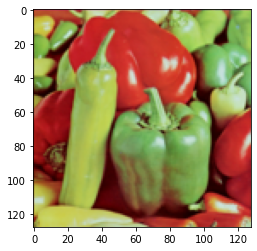

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(im)

We'll convert the image to an array of RGB values that has dimension 128 x 128 x 3.

In [ ]:
arr = np.array(im)
arr.shape

(128, 128, 3)

Let's separate out the colors and get a list of all the red, green, and blue values.

In [ ]:
r_values = arr[:, :, 0].flatten()
g_values = arr[:, :, 1].flatten()
b_values = arr[:, :, 2].flatten()

Now, let's take a look and see the pixels represented in the RGB space!

Text(0.5, 0, 'B')

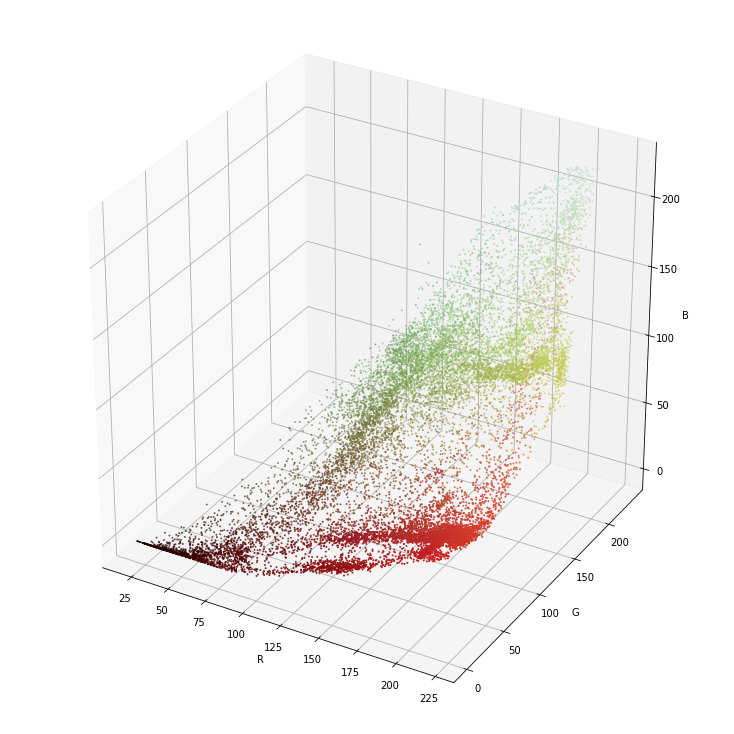

In [ ]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

# make a vector of colors to use in the scatterplot
colors = [(r_values[i]/255, g_values[i]/255, b_values[i]/255) for i in range(len(r_values))]

# open a 3D axis
fig = pyplot.figure(figsize=(10,10))
ax = Axes3D(fig)

# plot the pixels as points in the RGB space
ax.scatter(r_values, g_values, b_values, c=colors, s=1)
ax.set_xlabel("R")
ax.set_ylabel("G")
ax.set_zlabel("B")

Now, we'll construct the dataset (sample matrix, X) to use in clustering, which has 16,834 3-dimensional training examples.

In [ ]:
X = np.append(r_values.reshape(-1,1), g_values.reshape(-1,1), axis=1)
X = np.append(X,                      b_values.reshape(-1,1), axis=1)

X.shape

(16384, 3)

**Perform clustering on the pixel dataset with `k=16` clusters. Try the scikit-learn clustering implementation first and then if you have time, use your own clustering implementation. (It may take some time to perform clustering since there are a lot of examples.) Later, try changing the number of clusters.**

In [ ]:
# perform clustering on this dataset (using scikit learn or your own implementation) and print out the cluster centers

model1 = KMeans(n_clusters=16)
model1.fit(X)
model1.cluster_centers_

array([[180.07501995,  40.74381484,  38.2226656 ],
       [140.17118093, 189.47453954, 110.81365114],
       [107.49846154,  62.18769231,  35.36153846],
       [144.74331021,  22.45887017,  24.69672944],
       [ 49.79284834,   3.11097411,   2.16029593],
       [193.62430939, 218.07734807, 191.67403315],
       [121.31694313, 169.21149289,  82.81279621],
       [156.01116902, 177.45197319,  78.07594937],
       [202.25931677,  52.2510352 ,  42.24585921],
       [184.03131991, 201.67225951,  89.49832215],
       [ 87.3288835 ,  15.08737864,  12.31796117],
       [113.50169779, 137.18421053,  64.32852292],
       [181.70341207, 202.55774278, 147.5984252 ],
       [121.52192982, 102.31798246,  51.625     ],
       [193.37890625,  86.73046875,  58.40625   ],
       [200.19140625, 134.390625  ,  94.390625  ]])

I've defined some functions for you to be able to plot the clusters in the same way we did in class. If you run this cell after getting the cluster centers, you should see the cluster centers added to the figure. (they may be barely visible behind some other points)

Text(0.5, 0, 'B')

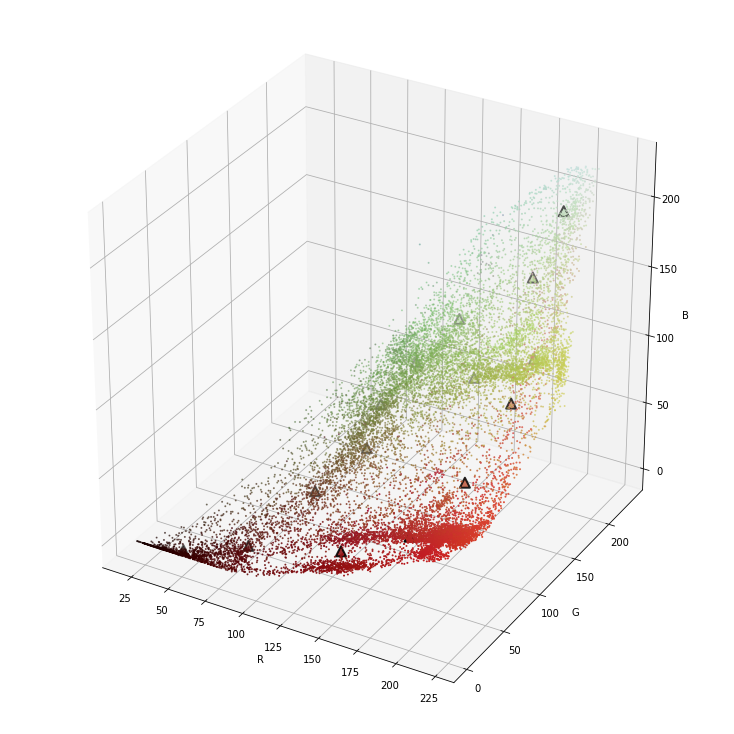

In [ ]:
# get RGB values of cluster centers
def get_rgb_from_cluster_centers(ccs):

    return ccs[:,0], ccs[:,1], ccs[:,2]

# get RGB tuples to use for colors in the scatterplot
def get_colors_from_cluster_centers(ccs):

    return [(ccs[i,0]/255, ccs[i,1]/255, ccs[i,2]/255) for i in range(ccs.shape[0])]


# get our cluster RGB values and plotting colors
cluster_r_values, cluster_g_values, cluster_b_values = get_rgb_from_cluster_centers(model1.cluster_centers_)
cluster_colors                                       = get_colors_from_cluster_centers(model1.cluster_centers_)

# open a 3D axis
fig = pyplot.figure(figsize=(10,10))
ax = Axes3D(fig)

# plot the pixels as points in the RGB space (note this isn't the same as we did in class... I'm still leaving the points as the colors they actually are in the image)
ax.scatter(r_values, g_values, b_values, c=colors, s=1)

# plot the clusters as points in the RGB space
ax.scatter(cluster_r_values, cluster_g_values, cluster_b_values, c=cluster_colors, s=100, 
           marker="^", edgecolor='k', linewidths=2)
ax.set_xlabel("R")
ax.set_ylabel("G")
ax.set_zlabel("B")

(Not required) If you want a challenge, try replacing each training example with its newly-associated cluster center (using its cluster label). Then, reshape the R-values using `r_values.reshape(128, 128, 1)` and similarly for the G-values and B-values. Then stack the RGB value matrices back into an image array that has shape `(128,128,3)` (maybe use `np.append` similarly to how I have done it before, but be careful of the axis direction). Finally, plot the image again as we did in the beginning by using `plt.imshow()` on your newly-reconstructed and compressed image.

Text(0.5, 1.0, 'Compressed Peppers')

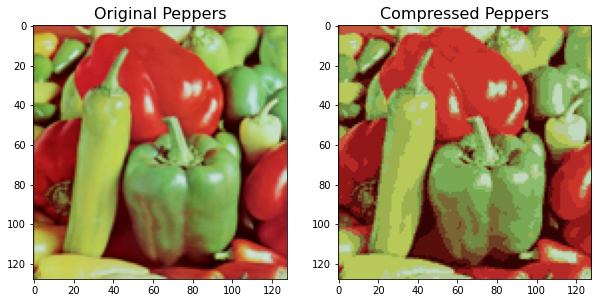

In [ ]:
new_colors = model1.cluster_centers_[model1.predict(X)]
im_compressed = (new_colors.reshape(arr.shape)/255)

fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(im)
ax[0].set_title('Original Peppers', size=16)
ax[1].imshow(im_compressed)
ax[1].set_title('Compressed Peppers', size=16)